# Testing qipQST

In [55]:
%load_ext autoreload

%autoreload 2
import qipQST as qst
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('default')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
gateX = qst.PiO2X()
gateY = qst.PiO2Y()
print(gateX.getMatrix())
print(gateY.getMatrix())

[[0.7066+0.j     0.    -0.7077j]
 [0.    -0.7077j 0.7066+0.j    ]]
[[ 0.7066-0.j -0.7077-0.j]
 [ 0.7077-0.j  0.7066-0.j]]


In [57]:
tau = 0.5
guess = 0

In [58]:
ramseyCircuit = qst.QuantumCircuit(guess)
ramseyCircuit.appendGate(qst.PiO2X())
ramseyCircuit.appendGate(qst.IdleGate(tau))
ramseyCircuit.appendGate(qst.PiO2Y())
ramseyCircuit.plotCircuitWaveform()

In [59]:
testSimulator = qst.PulseSimulator()
testSimulator.setQubit(qst.Qubit(0))
testSimulator.setCircuit(ramseyCircuit)
testSimulator.setTimeSteps(1, 10000)

In [60]:
testResult = testSimulator.simulateCircuit(1, 10000)

In [ ]:
#%matplotlib qt
#testResult.plotBloch()

[1.66611683e-04-7.07162301e-01j 7.07051218e-01+1.66637859e-04j]
[ 7.07273384e-01-7.06940135e-01j -5.55546773e-05-5.55285013e-05j]
[ 0.50007852-0.49992143j -0.4998429 -0.50015709j]
0.5000785476621709


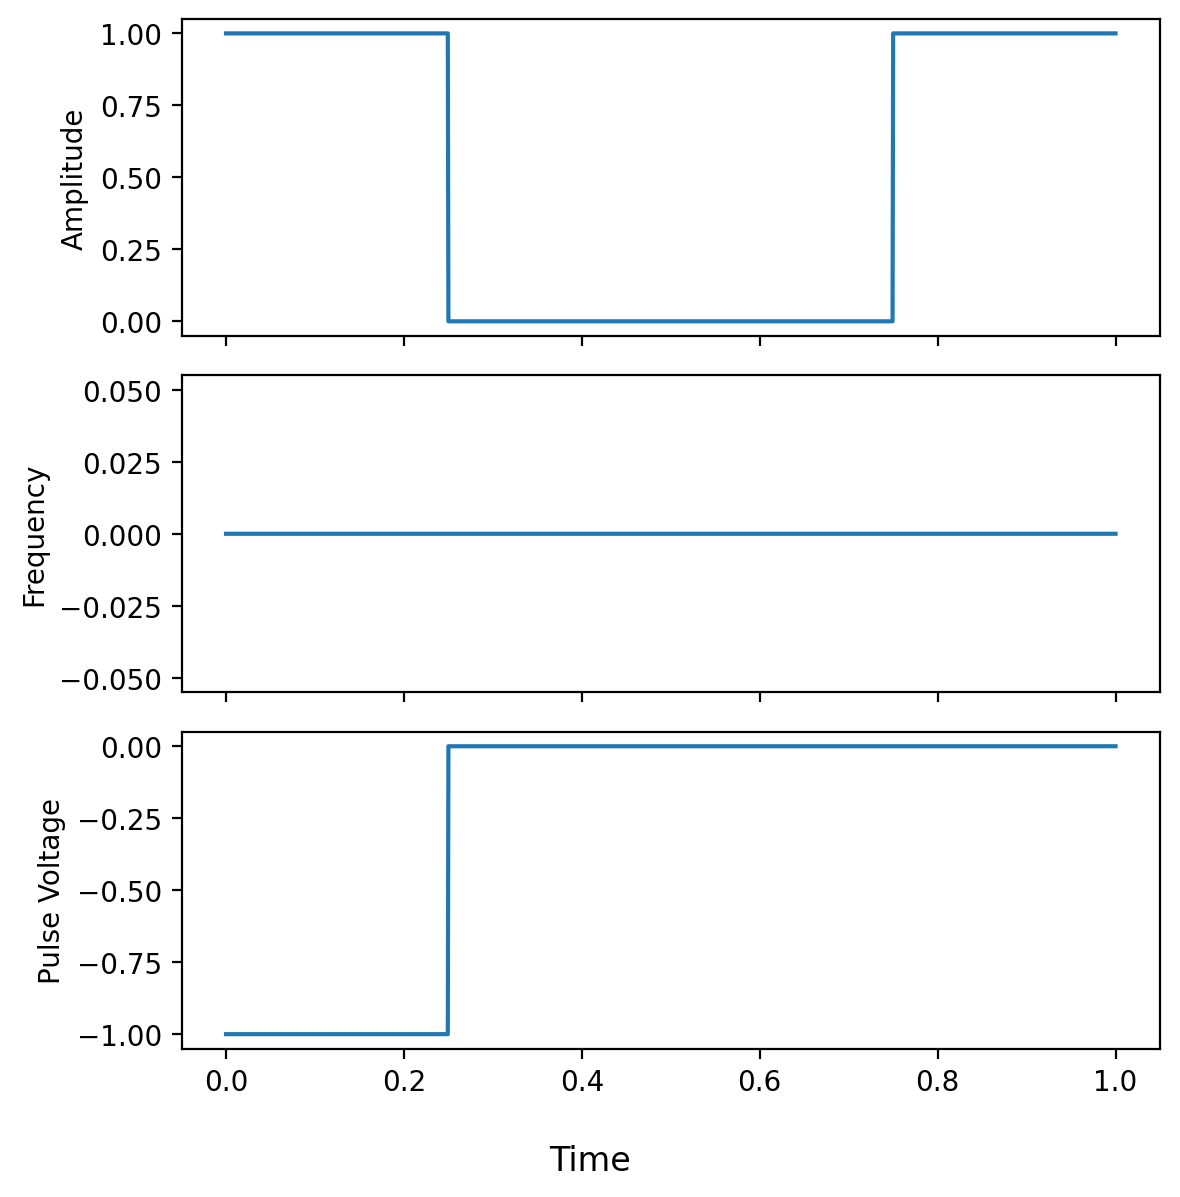

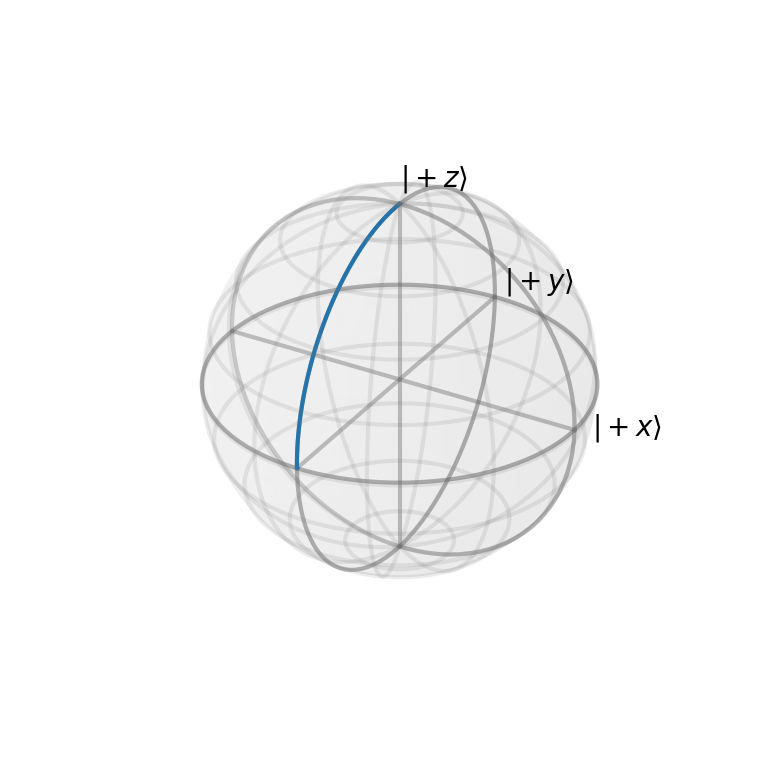

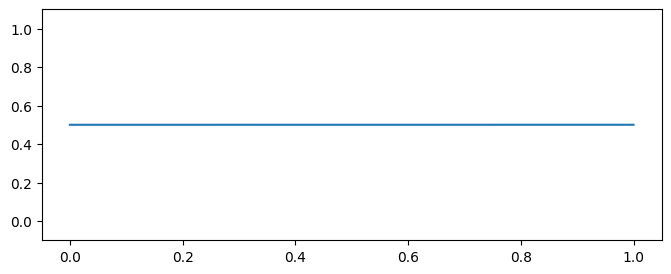

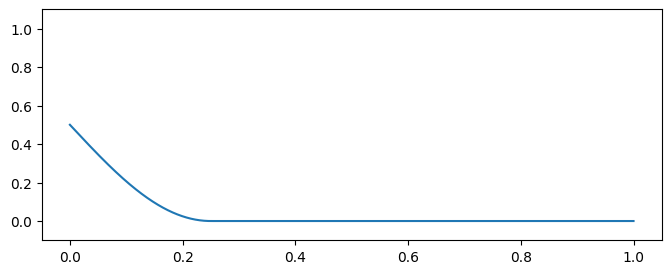

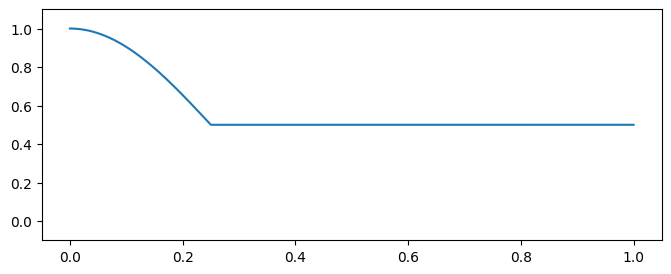

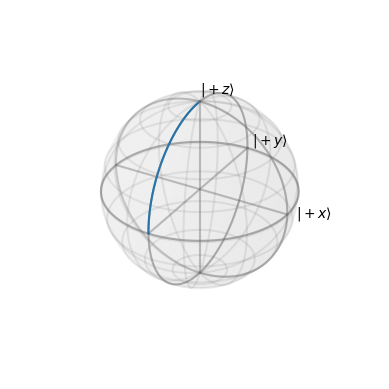

In [62]:
%matplotlib inline

print(testResult.qubit.states[-1].getState("X"))
print(testResult.qubit.states[-1].getState("Y"))
print(testResult.qubit.states[-1].getState("Z"))
print(testResult.qubit.states[-1].getProbability("+X"))

testResult.plotProbability("+X")
testResult.plotProbability("+Y")
testResult.plotProbability("+Z")
testResult.plotBloch()

# Ramsey

## Sweep Guess

In [9]:
guessResonances = np.linspace(-0.5, 0.5, 101).tolist()

In [10]:
guessResult = qst.ramsey.sweepGuess(guessResonances, 1.5, 100, "Y")

100%|██████████| 101/101 [00:00<00:00, 175.38it/s]


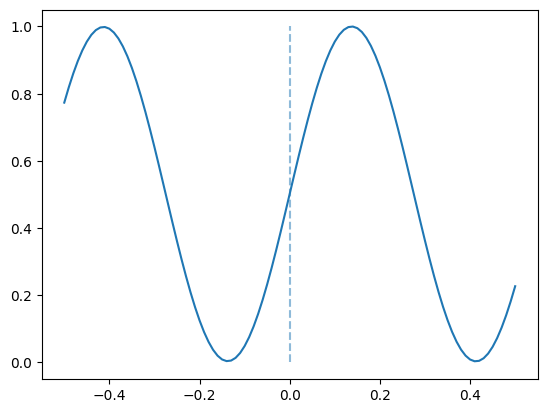

In [11]:
plt.plot(guessResonances, guessResult)
plt.vlines([0], 0, 1, linestyles="--", alpha=0.5)
plt.show()

## Sweep Tau

In [12]:
taus = np.linspace(0, 10, 101).tolist()

In [13]:
tauResults = qst.ramsey.sweepTau(taus, 0.1)

 52%|█████▏    | 53/101 [00:02<00:02, 23.22it/s]


KeyboardInterrupt: 

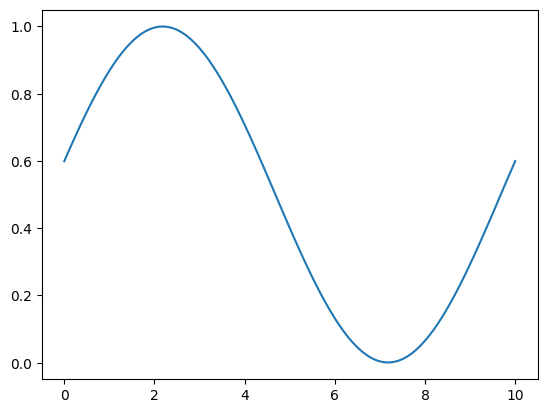

In [ ]:
plt.plot(taus, tauResults)
plt.show()

## Sweep Both

In [ ]:
guessResonances = np.linspace(-3, 3, 101).tolist()
taus = np.linspace(0, 2, 101).tolist()

In [ ]:
bothResultsX = qst.ramsey.sweepGuessAndTau(taus, guessResonances, numIterations=100)
bothResultsY = qst.ramsey.sweepGuessAndTau(taus, guessResonances, numIterations=100, secondGate="Y")

100%|██████████| 101/101 [00:47<00:00,  2.14it/s]


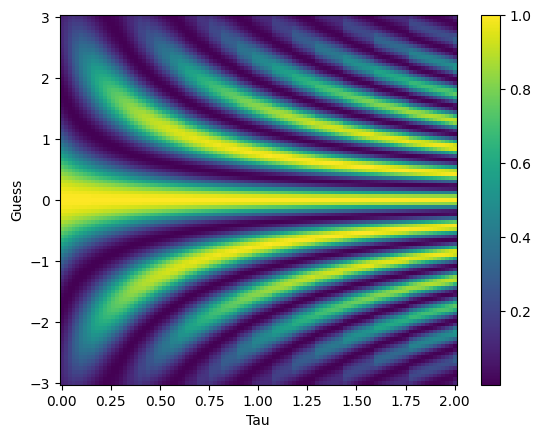

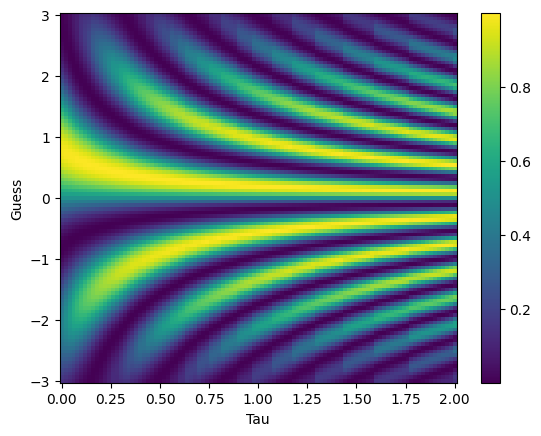

In [ ]:
X, Y = np.meshgrid(taus, guessResonances)
pcolorm = plt.pcolormesh(X, Y, bothResultsX, shading="nearest")
plt.colorbar(pcolorm)
plt.ylabel("Guess")
plt.xlabel("Tau")
plt.title("")
plt.show()

pcolorm = plt.pcolormesh(X, Y, bothResultsY, shading="nearest")
plt.colorbar(pcolorm)
plt.ylabel("Guess")
plt.xlabel("Tau")
plt.title("")
plt.show()